In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])

In [297]:
#equal energy contours
eps = 1
a = 1
t = 0.5
kx = np.linspace(-np.pi/a, np.pi/a, 1000)
ky = np.linspace(-np.pi/a, np.pi/a, 1000)
E = eps - 2*t*(np.cos(kx*a) + np.cos(ky*a))
KX, KY = np.meshgrid(kx, ky)
E_grid = eps - 2*t*(np.cos(KX*a) + np.cos(KY*a))


In [298]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': (10, 9)})

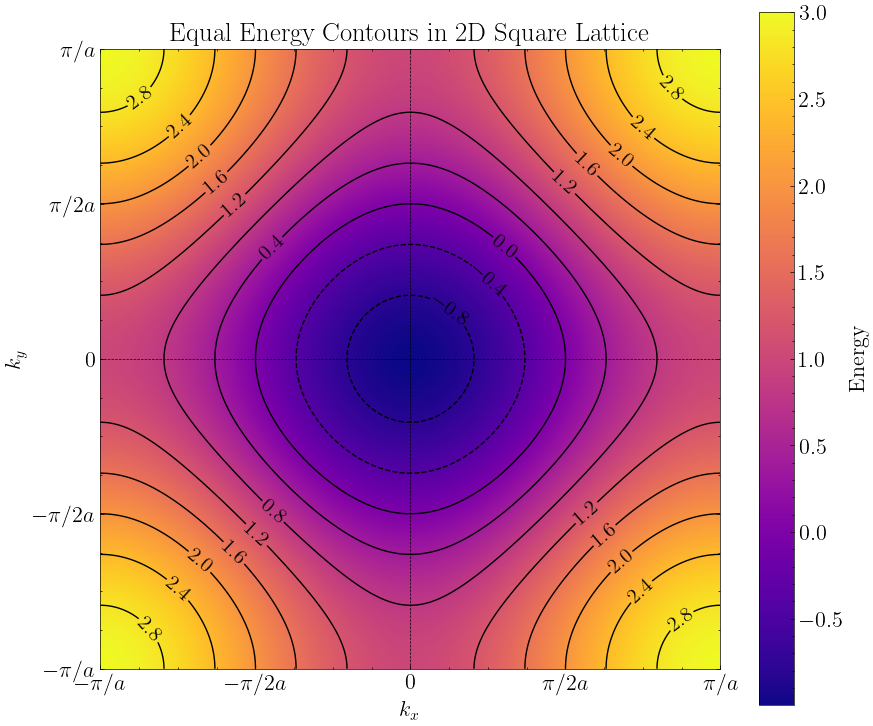

In [377]:

plt.figure(figsize=(10,9))
# contours = plt.contour(kx, ky, E.reshape(1000,1) + np.zeros((1,1000)), levels=10, cmap='viridis')

contours = plt.contour(KX, KY, E_grid, levels=10, colors="k")
plt.imshow(E_grid, extent=(-np.pi/a, np.pi/a, -np.pi/a, np.pi/a), origin='lower', cmap='plasma', alpha=1)

plt.clabel(contours, inline=True, fontsize=15)
plt.colorbar(label='Energy')
plt.title('Equal Energy Contours in 2D Square Lattice')
plt.xlabel('$k_x$ ')
plt.ylabel('$k_y$ ')
plt.xticks(np.arange(-np.pi/a, np.pi/a+0.1, np.pi/2)/a,
           [r'$-\pi/a$', r'$-\pi/2a$', '0', r'$\pi/2a$', r'$\pi/a$'])
plt.yticks(np.arange(-np.pi/a, np.pi/a+0.1, np.pi/2)/a,
           [r'$-\pi/a$', r'$-\pi/2a$', '0', r'$\pi/2a$', r'$\pi/a$'])
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
# plt.grid()
# plt.show()
plt.savefig('equal_energy_contours.png',dpi=300)

In [375]:
eps_p = 0.5
eps_s = 0.5
t_p = 1
t_s = 1.5
Omega = 1
kval = np.linspace(-np.pi/a, np.pi/a, 1000)

E_m = 0.5*(eps_p + eps_s - 2*(t_p + t_s)*np.cos(kval*a)) - 0.5*np.sqrt((eps_p - eps_s - 2*(t_p - t_s)*np.cos(kval*a))**2 + 4*Omega**2)
E_p = 0.5*(eps_p + eps_s - 2*(t_p + t_s)*np.cos(kval*a)) + 0.5*np.sqrt((eps_p - eps_s - 2*(t_p - t_s)*np.cos(kval*a))**2 + 4*Omega**2)

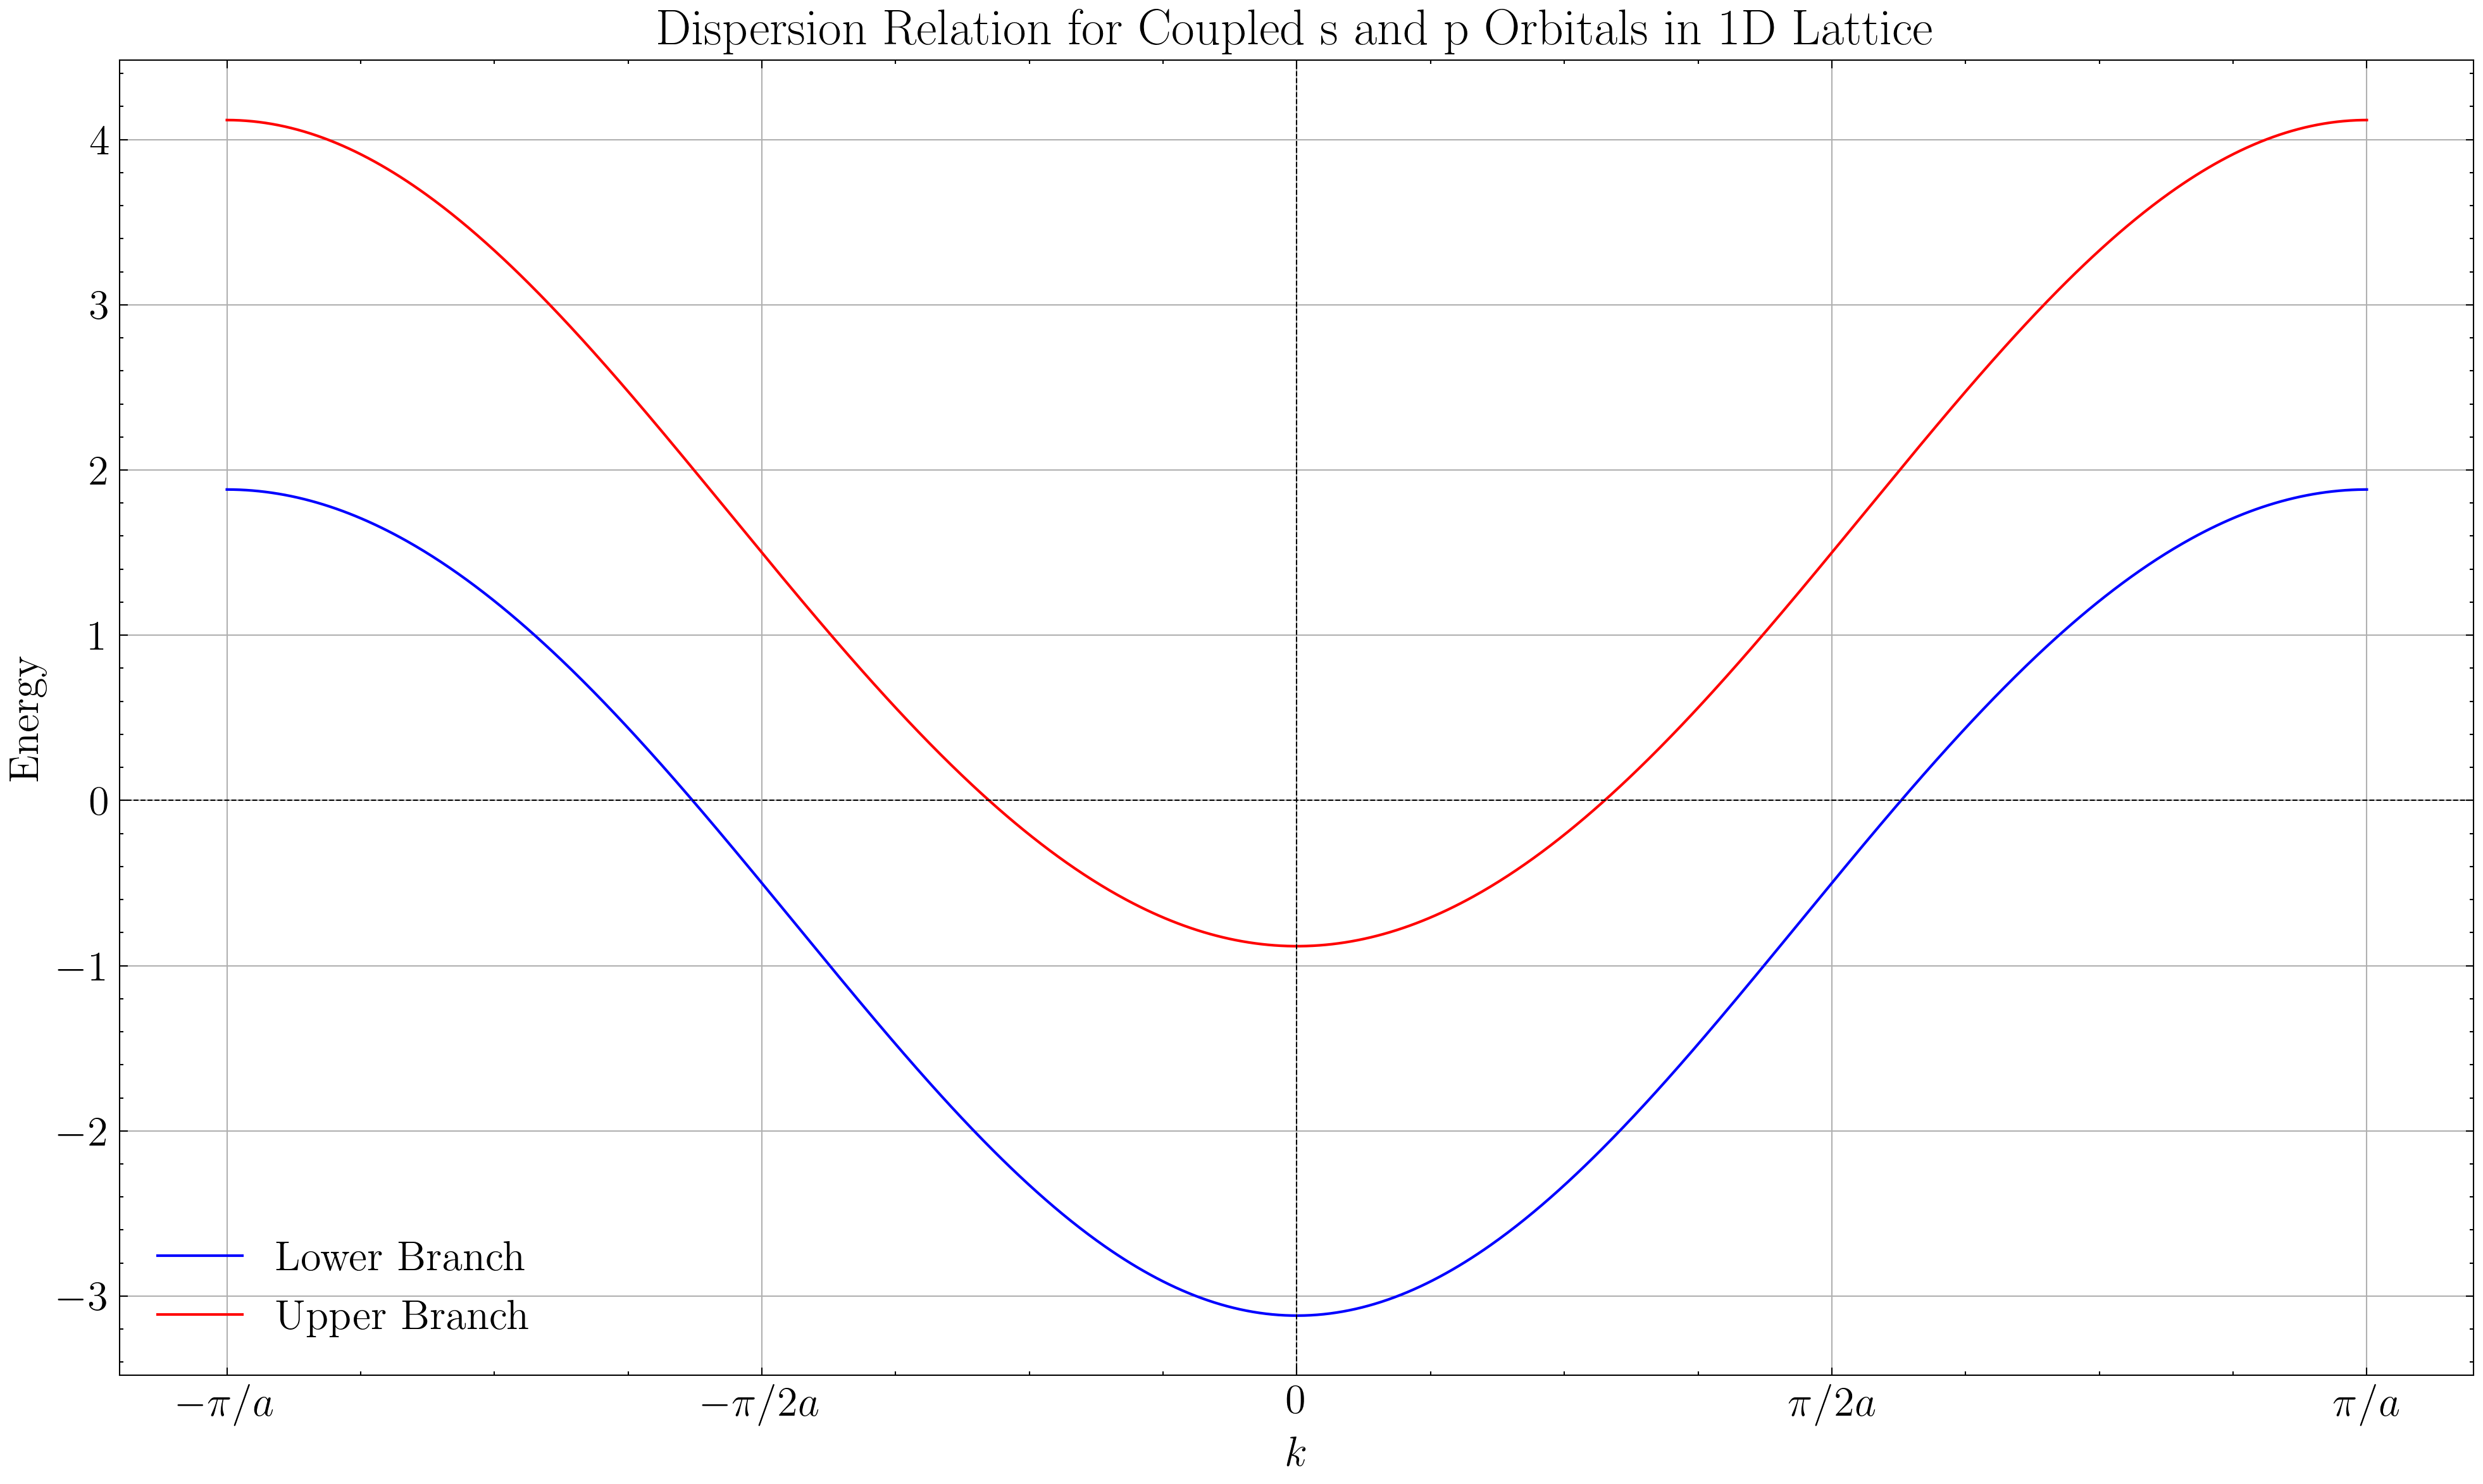

In [376]:
plt.figure(figsize=(16,9), dpi=300)
plt.plot(kval, E_m, label='Lower Branch', color='blue')
plt.plot(kval, E_p, label='Upper Branch', color='red')
plt.title('Dispersion Relation for Coupled s and p Orbitals in 1D Lattice')
plt.xlabel('$k$')
plt.xticks(np.arange(-np.pi/a, np.pi/a+0.1, np.pi/2)/a,
           [r'$-\pi/a$', r'$-\pi/2a$', '0', r'$\pi/2a$', r'$\pi/a$'])
plt.ylabel('Energy')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.legend()
plt.grid()
plt.savefig('coupled_orbitals_dispersion.png',dpi=300)

In [369]:
#energy bands in Kronig penny model
alpha = lambda E : np.sqrt(2*E)
beta = lambda E, V0 : np.sqrt(2*(V0 - E))
# RHS = lambda E, a, b, V0: np.cos(np.sqrt(2*E)*(a-b)) * np.cosh(np.sqrt(2*(V0 - E))*b) + ((V0 - 2*E)/(2*np.sqrt(E*(V0 - E)))) * np.sin(np.sqrt(2*E)*(a-b)) * np.sinh(np.sqrt(2*(V0 - E))*b)
RHS = lambda E, a, b, V0: np.cos(alpha(E)*(a-b)) * np.cosh(beta(E, V0)*b) + (beta(E,V0)**2 - alpha(E)**2)/(2*alpha(E)*beta(E,V0)) * np.sin(alpha(E)*(a-b)) * np.sinh(beta(E,V0)*b)
U = 100
Evals = np.linspace(1e-6, U-1e-6, 10000)
RHS_vals = RHS(Evals, a=1, b=0.05, V0=U)


In [370]:
RHS_vals

array([6.41643683, 6.38848137, 6.36059498, ..., 0.37736776, 0.37664728,
       0.37592665])

In [371]:
indices = np.where(np.abs(RHS_vals) <= 1)[0]
allowed_energies = RHS_vals[indices]
print("Allowed energy bands (in arbitrary units):")
print(allowed_energies)

Allowed energy bands (in arbitrary units):
[0.9876765  0.9746906  0.96174682 ... 0.37736776 0.37664728 0.37592665]


In [372]:
indices

array([ 273,  274,  275, ..., 9997, 9998, 9999])

In [373]:
Ene_bands = []
FE_bands = []
Ene_band_temp = []
FE_band_temp = []
for i in range(0,len(indices)):
    if i == len(indices)-1:
        Ene_band_temp.append(Evals[indices[i]])
        FE_band_temp.append(allowed_energies[i])
        Ene_bands.append(Ene_band_temp)
        FE_bands.append(FE_band_temp)
        
    
    elif indices[i+1] - indices[i] == 1:
        print(indices[i],i)
        Ene_band_temp.append(Evals[indices[i]])
        FE_band_temp.append(allowed_energies[i])
    else:
        Ene_band_temp.append(Evals[indices[i]])
        FE_band_temp.append(allowed_energies[i])
        Ene_bands.append(Ene_band_temp)
        FE_bands.append(FE_band_temp)
        Ene_band_temp = []
        FE_band_temp = []
    


273 0
274 1
275 2
276 3
277 4
278 5
279 6
280 7
281 8
282 9
283 10
284 11
285 12
286 13
287 14
288 15
289 16
290 17
291 18
292 19
293 20
294 21
295 22
296 23
297 24
298 25
299 26
300 27
301 28
302 29
303 30
304 31
305 32
306 33
307 34
308 35
309 36
310 37
311 38
312 39
313 40
314 41
315 42
316 43
317 44
318 45
319 46
320 47
321 48
322 49
323 50
324 51
325 52
326 53
327 54
328 55
329 56
330 57
331 58
332 59
333 60
334 61
335 62
336 63
337 64
338 65
339 66
340 67
341 68
342 69
343 70
344 71
345 72
346 73
347 74
348 75
349 76
350 77
351 78
352 79
353 80
354 81
355 82
356 83
357 84
358 85
359 86
360 87
361 88
362 89
363 90
364 91
365 92
366 93
367 94
368 95
369 96
370 97
371 98
372 99
373 100
374 101
375 102
376 103
377 104
378 105
379 106
380 107
381 108
382 109
383 110
384 111
385 112
386 113
387 114
388 115
389 116
390 117
391 118
392 119
393 120
394 121
395 122
396 123
397 124
398 125
399 126
400 127
401 128
402 129
403 130
404 131
405 132
406 133
407 134
408 135
409 136
410 137
411 13

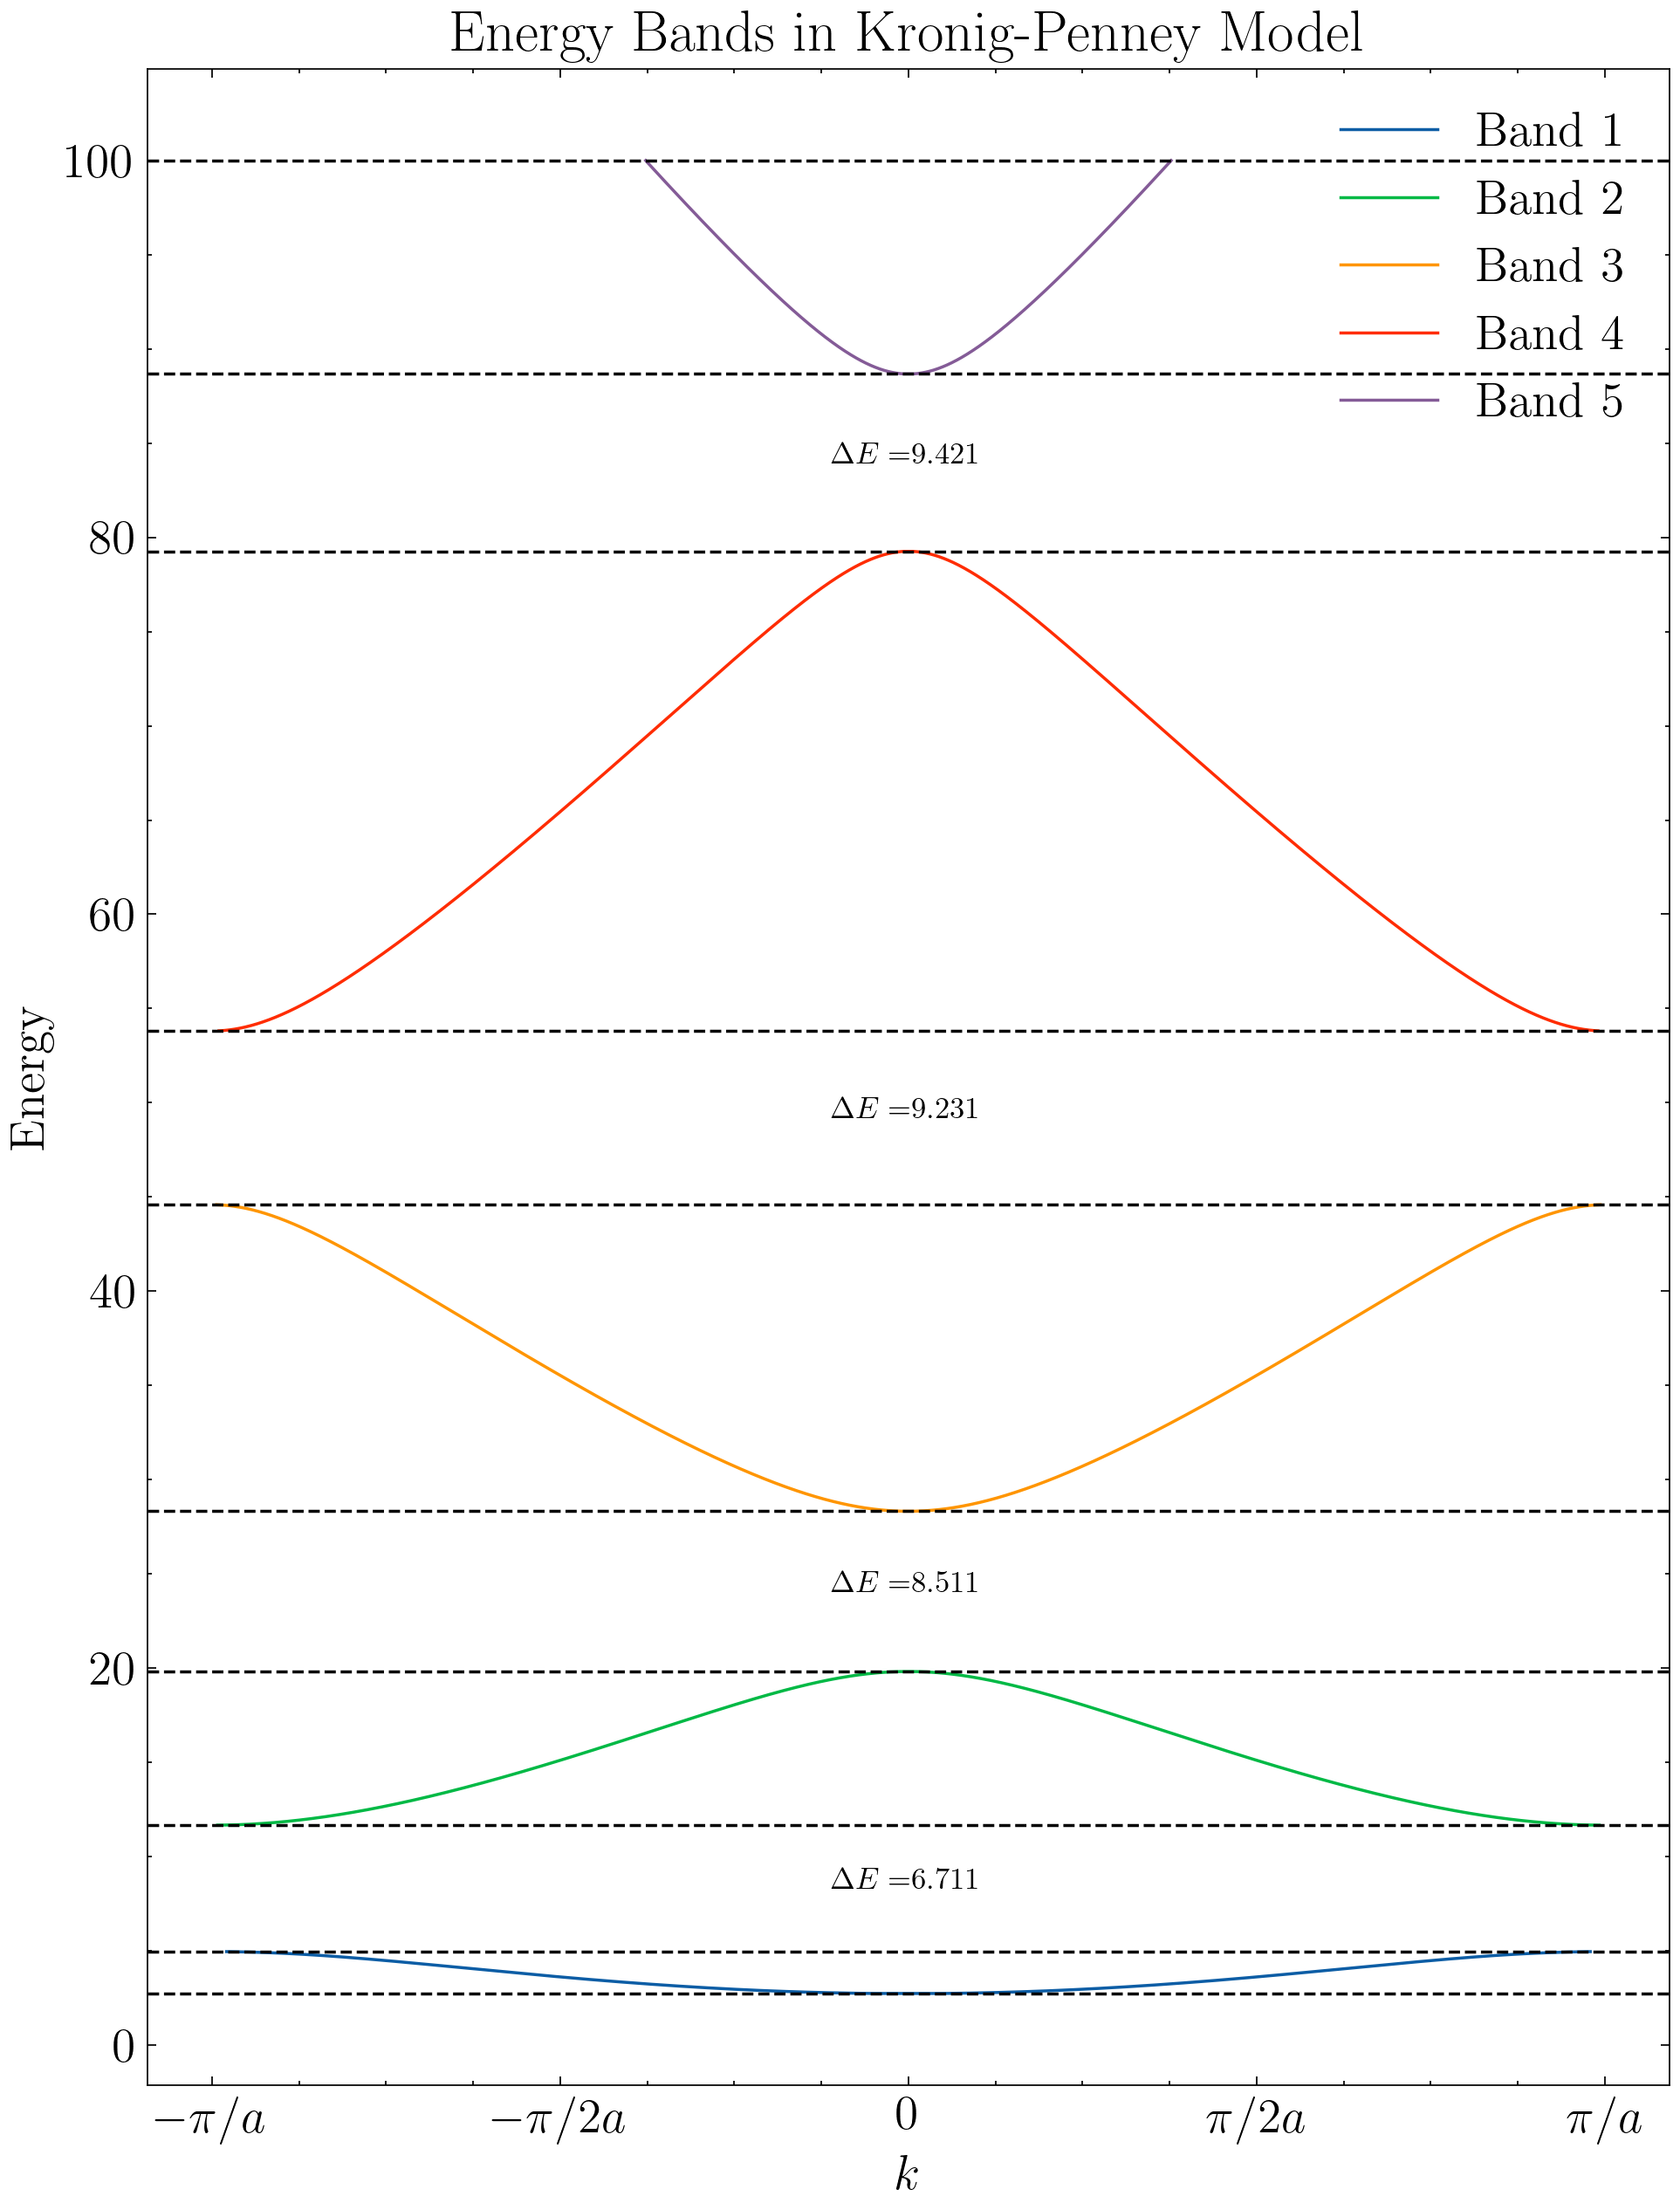

In [374]:
plt.figure(figsize=(9,12), dpi=250)
lol1 = min(Ene_bands[1])
for i in range(len(Ene_bands)):
    if i%2 == 0:
        BANDS = np.asarray([-np.acos(FE_bands[i])[::-1], np.acos(FE_bands[i])])
        BANDS = BANDS.flatten()
        
        EBANDS = np.asarray([Ene_bands[i][::-1], Ene_bands[i]])
        EBANDS = EBANDS.flatten()
        plt.plot(BANDS, EBANDS, '-', label=f'Band {i+1}')
        plt.axhline(min(EBANDS), color='black',linewidth=1, ls='--')
        plt.axhline(max(EBANDS), color='black',linewidth=1, ls='--')
        lol2 = max(EBANDS)
        if i+1 < len(Ene_bands):
            lol1 = min(Ene_bands[i+1])
            plt.annotate(r"$\Delta E =$"+f'{lol1 - lol2:.3f}', xy=(0, (max(EBANDS))), xytext=(-.35, (lol1+lol2)/2),fontsize=10)
            
    else:
        BANDS = np.asarray([-np.acos(FE_bands[i]), np.acos(FE_bands[i])[::-1]])
        BANDS = BANDS.flatten()
        
        EBANDS = np.asarray([Ene_bands[i], Ene_bands[i][::-1]])
        EBANDS = EBANDS.flatten()
        plt.plot(BANDS, EBANDS, '-', label=f'Band {i+1}' )
        plt.axhline(min(EBANDS), color='black',linewidth=1, ls='--')
        plt.axhline(max(EBANDS), color='black',linewidth=1, ls='--')
        lol2 = max(EBANDS)
        if i+1 < len(Ene_bands):
            lol1 = min(Ene_bands[i+1])
            plt.annotate(r"$\Delta E =$"+f'{lol1 - lol2:.3f}', xy=(0, (min(EBANDS)+max(EBANDS))/2), xytext=(-.35, (lol1+lol2)/2),fontsize=10)
plt.legend()
plt.xticks(np.arange(-np.pi/a, np.pi/a+0.1, np.pi/2)/a,
           [r'$-\pi/a$', r'$-\pi/2a$', '0', r'$\pi/2a$', r'$\pi/a$'])
plt.xlabel(r'$k$')
plt.ylabel('Energy')
plt.title('Energy Bands in Kronig-Penney Model')
plt.savefig('kronig_penney_bands.png',dpi=300)
    # plt.plot(np.acos(FE_bands[i]), Ene_bands[i], '-')
    # plt.plot(-np.acos(FE_bands[i]), Ene_bands[i], '-')

In [296]:
import scipy.special as spc

In [324]:
energyvals = np.linspace(-9, 10, 1000)
eps0 = 1.0
t = 1. 
x = 1 - ((energyvals - eps0)/(4*t))**2


def density_of_states(energy,t):
    eps0 = 1.0
    x = 1 - ((energy - eps0)/(4*t))**2
    dos = 1/(2 * (np.pi**2) *t) * spc.ellipk(x)
    cond = eps0 - 4*t <= energy <= eps0 + 4*t
    if cond:
        return dos
    else:
        dos = 0
    return dos

In [334]:
y1 = np.asarray([density_of_states(E,1) for E in energyvals])
y1p5 = np.asarray([density_of_states(E,1.5) for E in energyvals])
y0p5 = np.asarray([density_of_states(E,0.5) for E in energyvals])
y0p75 = np.asarray([density_of_states(E,0.75) for E in energyvals])
y1p25 = np.asarray([density_of_states(E,1.25) for E in energyvals])

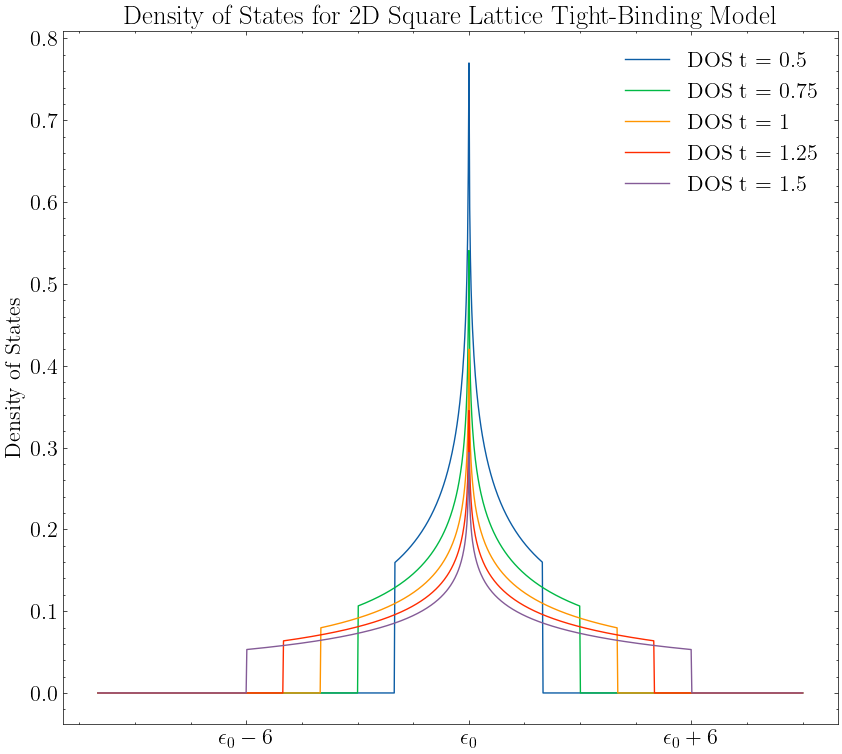

In [338]:
plt.plot(energyvals, y0p5,label='DOS t = 0.5')
plt.plot(energyvals, y0p75,label='DOS t = 0.75')
plt.plot(energyvals, y1,label='DOS t = 1')
plt.plot(energyvals, y1p25,label='DOS t = 1.25')
plt.plot(energyvals, y1p5,label='DOS t = 1.5')
plt.xticks([eps0-6,eps0, eps0+6],[r"$\epsilon_0-6$", r"$\epsilon_0$", r"$\epsilon_0+6$"])
plt.ylabel('Density of States')
plt.legend()
plt.title('Density of States for 2D Square Lattice Tight-Binding Model')
plt.savefig('density_of_states.png',dpi=300)

In [362]:

#fermi surface
k_xval = np.linspace(-np.pi, np.pi, 400)
y_1 = np.pi - k_xval
y_2 = -np.pi - k_xval
y_3 = k_xval - np.pi
y_4 = k_xval + np.pi

def fermi_momentum(kx,c):
    if kx >= 0 and c==-1:
        return np.pi - kx
    elif kx < 0 and c==-1:
        return  kx +np.pi
    elif kx >= 0 and c==1:
        return kx - np.pi
    else:
        return -kx - np.pi   
    

In [363]:
y_1 = np.asarray([fermi_momentum(kx,-1) for kx in k_xval])
y_2 = np.asarray([fermi_momentum(kx,1) for kx in k_xval])

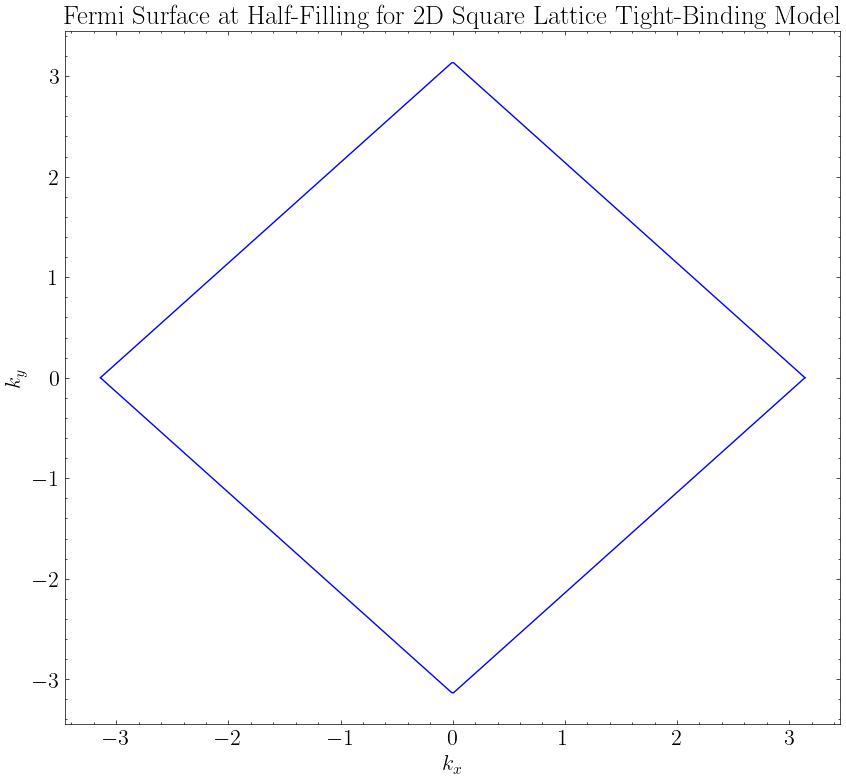

In [368]:
plt.plot(k_xval,y_1, label=r'$k_y = \pi - k_x$', color = 'blue')
plt.plot(k_xval,y_2, label=r'$k_y = -\pi - k_x$', color = 'blue')
# plt.plot(k_xval,y_3, label=r'$k_y = k_x - \pi$')
# plt.plot(k_xval,y_4, label=r'$k_y = k_x + \pi$')
plt.title('Fermi Surface at Half-Filling for 2D Square Lattice Tight-Binding Model')
plt.xlabel('$k_x$ ')
plt.ylabel('$k_y$ ')
plt.savefig('fermi_surface.png',dpi=300)